


1/1 [==============================] - 0s 167ms/step
Prediction:  Fake
None


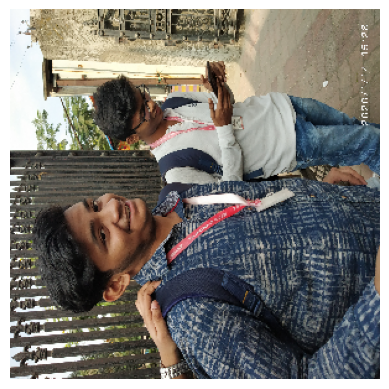

In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the model
model = load_model('./modelload.hdf5')

cap = cv2.VideoCapture(0)

while True:
    # Capture a frame
    ret, frame = cap.read()

    # Perform any preprocessing needed for your model
    frame = cv2.resize(frame, (299, 299))  # Resize to match the input size of XceptionNet
    img_array = image.img_to_array(frame)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if the model was trained with normalized data

    # Make predictions
    predictions = model.predict(img_array)

    # Post-process predictions as needed
    threshold = 0.5
    is_deepfake = predictions[0, 0] > threshold

    # Display the result as an annotation box
    if is_deepfake:
        cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 2)  # Red box for deepfake
        text = "Deepfake Detected"
    else:
        text = "Real"

    # Display text
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the frame with predictions
    cv2.imshow('Deepfake Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (299,299))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

print(ImagePrediction("D://MORGUE//Memories//Lakshya//Sadau//IMG_20200114_152811.jpg"))

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('path/to/your/xception_model.h5')

# Open a connection to the camera (usually, 0 represents the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame
    ret, frame = cap.read()

    # Perform any preprocessing needed for your model
    frame = cv2.resize(frame, (299, 299))  # Resize to match the input size of XceptionNet
    img_array = image.img_to_array(frame)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize if the model was trained with normalized data

    # Make predictions
    predictions = model.predict(img_array)

    # Post-process predictions as needed
    # ...

    # Display the frame with predictions
    cv2.imshow('Deepfake Detection', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the OpenCV window
cap.release()
cv2.destroyAllWindows()
